<a href="https://colab.research.google.com/github/amanprakash9/Python_Code/blob/master/US_Sales_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import warnings
warnings.simplefilter('ignore')

%matplotlib inline

In [5]:
 data =pd.read_csv("US_Sales.csv")

In [6]:
data.head()

,USVehicleSales,date
0,885.2,1/1/1976
1,994.7,2/1/1976
2,1243.6,3/1/1976
3,1191.2,4/1/1976
4,1203.2,5/1/1976


In [9]:
! pip install pmdarima

# Import the library
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 5.9 MB/s 
     |████████████████████████████████| 9.9 MB 46.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [12]:

# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(data['USVehicleSales'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=6159.461, Time=3.19 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=6567.091, Time=0.09 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=6325.174, Time=1.38 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=6427.786, Time=2.02 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=6566.836, Time=0.08 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=6282.418, Time=0.81 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=6133.136, Time=5.21 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=6244.004, Time=2.91 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=6129.015, Time=11.51 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=6208.637, Time=8.29 sec
 ARIMA(1,0,1)(2,1,2)[12] intercept   : AIC=inf, Time=13.78 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=6131.468, Time=7.39 sec
 ARIMA(0,0,1)(2,1,1)[12] intercept   : AIC=inf, Time=8.51 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=6226.285, Time=6.15 sec
 ARIMA(2,0,1)(2,1,1)[12] in

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  528
Model:             SARIMAX(2, 0, 3)x(2, 1, [1], 12)   Log Likelihood               -3054.041
Date:                              Fri, 02 Dec 2022   AIC                           6126.082
Time:                                      07:39:06   BIC                           6164.297
Sample:                                           0   HQIC                          6141.058
                                              - 528                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8583      0.134     13.831      0.000       1.595       2.122
ar.L2         -0.8637      0.130     -6.628      0.000      -1.119      -0.608
ma.L1         -1.4715      0.141    -10.472      0.000      -1.747      -1.196
ma.L2          0.4191      0.113      3.694      0.000       0.197       0.641
ma.L3          0.1121      0.043      2.583      0.010       0.027       0.197
ar.S.L12       0.2355      0.058      4.071      0.000       0.122       0.349
ar.S.L24      -0.1278      0.056     -2.284      0.022      -0.238      -0.018
ma.S.L12      -0.8220      0.047    -17.656      0.000      -0.913      -0.731
sigma2      8039.0708    363.501     22.116      0.000    7326.622    8751.519
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               132.03
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                             0.18
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
# Split data into train / test sets
train = data.iloc[:len(data)-12]
test = data.iloc[len(data)-12:] # set one year(12 months) for testing
  
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train['USVehicleSales'], 
                order = (2, 0, 3), 
                seasonal_order =(2, 1, 1, 12))
  
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                       USVehicleSales   No. Observations:                  516
Model:             SARIMAX(2, 0, 3)x(2, 1, [1], 12)   Log Likelihood               -2985.432
Date:                              Fri, 02 Dec 2022   AIC                           5988.864
Time:                                      07:41:04   BIC                           6026.867
Sample:                                           0   HQIC                          6003.771
                                              - 516                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5556      0.352      4.424      0.000       0.866       2.245
ar.L2         -0.5693      0.343     -1.662      0.097      -1.241       0.102
ma.L1         -1.1641      0.354     -3.287      0.001      -1.858      -0.470
ma.L2          0.2234      0.227      0.983      0.326      -0.222       0.669
ma.L3          0.1124      0.045      2.520      0.012       0.025       0.200
ar.S.L12       0.2824      0.054      5.261      0.000       0.177       0.388
ar.S.L24      -0.1279      0.056     -2.290      0.022      -0.237      -0.018
ma.S.L12      -0.8412      0.044    -19.227      0.000      -0.927      -0.755
sigma2      7987.5496    356.602     22.399      0.000    7288.622    8686.477
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               121.81
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                             0.13
Prob(H) (two-sided):                  0.04   Kurtosis:                         5.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

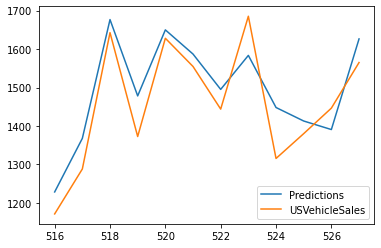

In [15]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['USVehicleSales'].plot(legend = True)

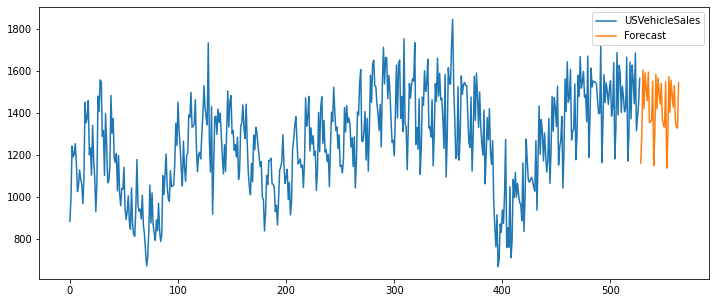

In [16]:
# Train the model on the full dataset
model = model = SARIMAX(data['USVehicleSales'], 
                        order = (2, 0, 3), 
                        seasonal_order =(2, 1, 1, 12))
result = model.fit()
  
# Forecast for the next 3 years
forecast = result.predict(start = len(data), 
                          end = (len(data)-1) + 3 * 12, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
data['USVehicleSales'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)